In [80]:
import os
import tarfile # 
from six.moves import urllib

In [81]:
os.getcwd()

'/content'

In [82]:
DOWNLOAD_ROOT  = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [83]:
"""
fetch_housing_data function
- 작업공간에 tar.gz file을 URL에서 housing_path에 다운로드 받고, 해당 파일의 압축을 푸는 함수
urllib.request             --> URL을 열기 위한 확장 가능한 라이브러리
urllib.request.urlretrieve --> 
tarfile.open               --> tar.gz를 압축 해제하지 않고 읽기
housing_tgz.extractall     --> tar.gz 의 압축 해제 하는 듯
housing_tgz.close()        --> open --> close 

"""
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [84]:
import pandas as pd
'''
load_housing_data function
- csv file을 읽어 판다스 데이터프레임 객체를 return 하는 함수
- pd.read_csv(path) --> csv를 읽어 판다스 데이터 프레임으로 return 해 주는 함수
'''
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(HOUSING_PATH, "housing.csv")
  return pd.read_csv(csv_path)

In [85]:
fetch_housing_data()
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [150]:
'''
df.info() --> 데이터에 대한 간략한 설명. 전체 행 수, 각 특성의 데이터 타입과 null이 아닌 값의 개수 확인
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [87]:
'''
value_counts --> 카테고리 별로 개수가 몇개인지 확인 가능
describe     --> 수치형 변수들의 통계 요약 정보 보여줌 
'''
df['ocean_proximity'].value_counts()
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25f65a320>,
      dtype=object)

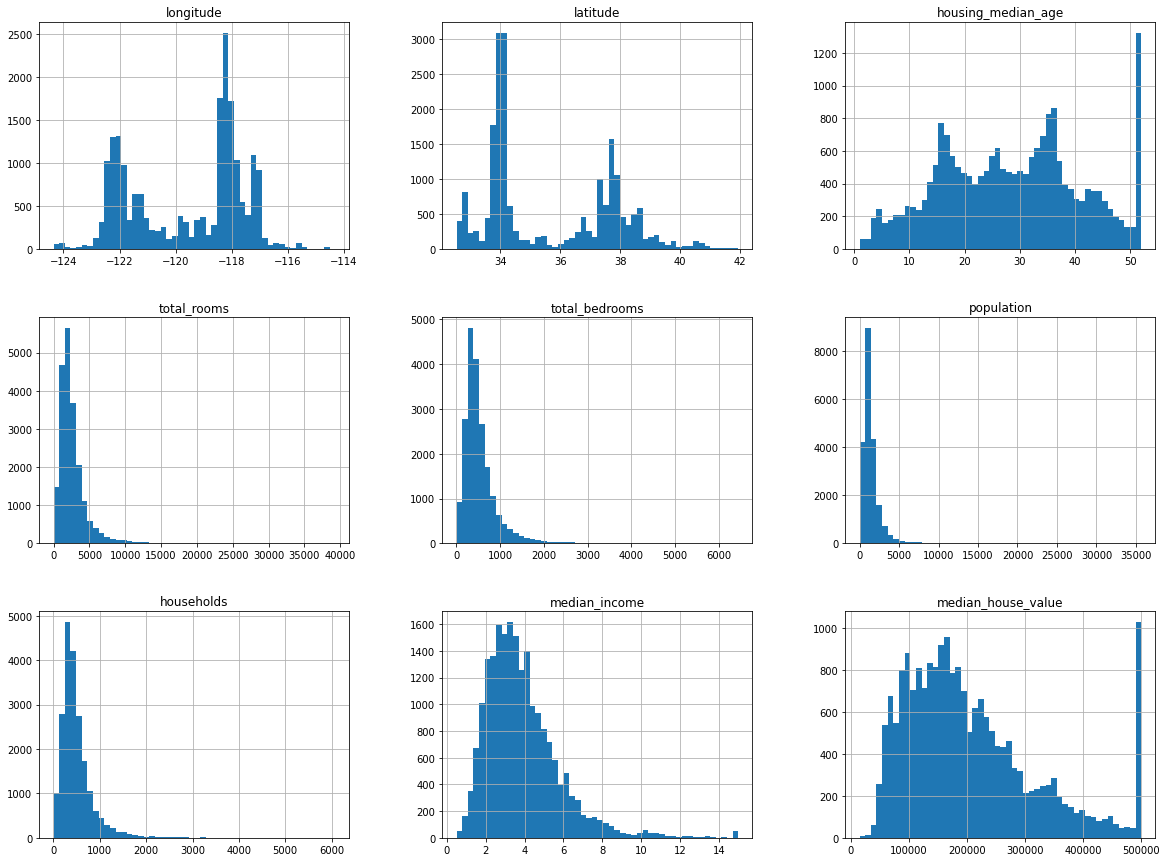

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20, 15)) 

In [89]:
import numpy as np
def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled_idx = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_idx  =  shuffled_idx[:test_idx] 
  train_idx =  shuffled_idx[test_idx:]
  return data.idoc[train_idx],  data.idoc[test_idx]

In [90]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [91]:
def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
  return data[~in_test_set], data[in_test_set]

In [92]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, 'index')
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [93]:
'''
train_test_split --> train , test dataset으로 나눠줌
행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있음. 
@random_state :  난수 초기값을 지정

'''
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

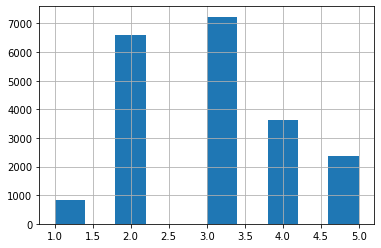

In [94]:
'''
df.where(Series 객체에 대한 조건문, 거짓에 대한 대체 값)
'''
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace = True)
df['income_cat'].hist()

In [95]:
'''
sklearn의 StratifiedShuffleSplit function
StratifiedShuffleSplit(n_split, test_size, )
'''
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 46)
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [96]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

In [97]:
housing = strat_train_set.copy()

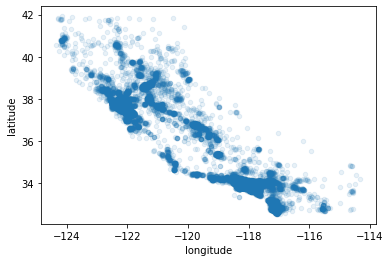

In [98]:
housing.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.1)

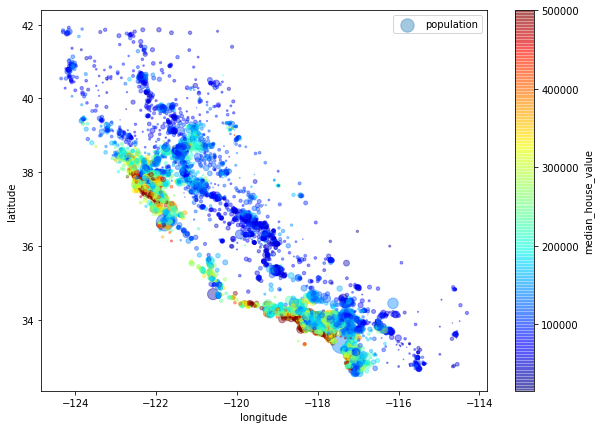

In [99]:
housing.plot(kind  = 'scatter', 
             x     = 'longitude', 
             y     = 'latitude', 
             alpha = 0.4, 
             s     = housing['population']/100, 
             label = 'population', 
             figsize = (10, 7), 
             c = "median_house_value", 
             cmap = plt.get_cmap("jet"),
             colorbar = True,
             sharex   = False)
plt.legend()

In [100]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = True)

latitude             -0.139874
longitude            -0.048800
population           -0.024839
total_bedrooms        0.049499
households            0.064747
housing_median_age    0.104786
total_rooms           0.133094
median_income         0.691489
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [101]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]     # 가구당 방 개수
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]   # 방 개수당 침실 수
housing["population_per_household"] = housing["population"] / housing["households"] # 가구당 인구 수

In [102]:
corr_drived_matrix = housing.corr()
corr_drived_matrix["median_house_value"].sort_values(ascending = True)

bedrooms_per_room          -0.257678
latitude                   -0.139874
longitude                  -0.048800
population_per_household   -0.048487
population                 -0.024839
total_bedrooms              0.049499
households                  0.064747
housing_median_age          0.104786
total_rooms                 0.133094
rooms_per_household         0.157872
median_income               0.691489
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [103]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy( )

In [104]:
'''
fillna function
@value  : 결측에 대체하고자 하는 값
@method : 
@axis   : 0 : index, 1 : columns
@inplace : True면 기존 컬럼에 결측치 대체, False 면 새로운 컬럼 생성
'''

housing.dropna(subset=["total_bedrooms"]) # 옵션 1
housing.drop("total_bedrooms", axis = 1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)

In [105]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
print(imputer.statistics_)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = list(housing.index.values))

[-118.5      34.26     29.     2121.5     435.     1169.      409.
    3.5333]


In [106]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4924,-118.24,34.00,23.0,588.0,157.0,716.0,173.0,1.2056
762,-122.08,37.65,35.0,1813.0,393.0,1093.0,374.0,3.6818
6126,-117.92,34.11,24.0,2838.0,695.0,2151.0,645.0,3.2202
18203,-122.05,37.38,23.0,3200.0,907.0,2029.0,866.0,3.5649
10011,-121.10,39.15,10.0,680.0,143.0,354.0,140.0,4.0333


In [107]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
4924,<1H OCEAN
762,NEAR BAY
6126,<1H OCEAN
18203,<1H OCEAN
10011,INLAND
3533,<1H OCEAN
11781,INLAND
4761,<1H OCEAN
14282,NEAR OCEAN
2671,INLAND


In [108]:
'''
Categorical 데이터를 숫자로 변환
'''
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [109]:
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [4.],
       [1.]])

In [110]:
'''
.categories_ --> 범주형 특성마다 카테고리들의 1D 배열을 담은 리스트가 반환됨
'''
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [111]:
'''
One-Hot encoding
'''
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # 출력이 넘파이 배열이 아닌 Sparse Row format
housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [112]:
'''
sklearn을 이용한 나만의 변환기 만들기
fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 됨
TransformerMixin을 상속하면 자동으로 생성
BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드(get_params(), set_params())를 추가로 얻게됨
'''
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y = None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [113]:
housing_extra_attribs

array([[-118.24, 34.0, 23.0, ..., '<1H OCEAN', 3.398843930635838,
        4.138728323699422],
       [-122.08, 37.65, 35.0, ..., 'NEAR BAY', 4.847593582887701,
        2.9224598930481283],
       [-117.92, 34.11, 24.0, ..., '<1H OCEAN', 4.4, 3.3348837209302324],
       ...,
       [-119.76, 36.82, 17.0, ..., 'INLAND', 4.770818995182381,
        2.1032346868547833],
       [-118.41, 34.0, 35.0, ..., '<1H OCEAN', 3.45928338762215,
        3.3420195439739415],
       [-117.71, 34.05, 20.0, ..., 'INLAND', 4.742203742203742,
        3.212058212058212]], dtype=object)

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attr_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [125]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
import math 
some_data = housing
some_labels = housing_labels
some_data_prepared = full_pipeline.fit_transform(some_data)
print("예측   : ", np.round(lin_reg.predict(some_data_prepared[:5])))
print("레이블 : ", list(some_labels)[:5])

예측   :  [100099. 226769. 175674. 251758. 111818.]
레이블 :  [87500.0, 165400.0, 126200.0, 450000.0, 161500.0]


In [153]:
'''
sklearn.metrics --> mean_squared_error function(Y, YHat)
'''
from sklearn.metrics import mean_squared_error
housing_YHat = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, housing_YHat) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68065.69122383039

In [154]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [156]:
# 교차검증을 사용한 평가
'''
sklearn의 교차검증기능은 비용함수가 아닌 효용함수를 기대하므로, 클수록 좋다고 판단함
따라서 scoring을 neg_mean_squared_error 로 변경해야 함
'''
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [163]:
def display_scores(scores):
  print("점수 : ", scores)
  print("평균 : ", scores.mean())
  print("표준편차 :", scores.std())

In [164]:
display_scores(tree_rmse_scores)

점수 :  [70830.23447496 71156.75619521 71033.17021238 70694.79112001
 65175.21234599 70351.86325807 69294.3223961  71897.87155078
 70327.45197945 71083.96593555]
평균 :  70184.56394685146
표준편차 : 1789.4524015137058


In [165]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
reg_rmse_scores = np.sqrt(-scores)
display_scores(reg_rmse_scores)

점수 :  [67042.27191545 67714.35840595 67202.27447772 72835.74518388
 66580.76898861 69402.08476101 65453.53737299 72315.36473198
 65353.22532041 69700.91937019]
평균 :  68360.05505281965
표준편차 : 2504.1701462915858


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

In [169]:
forest_YHat = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_YHat)
forest_rmse = np.sqrt(forest_mse)

18568.75111205212

In [170]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

점수 :  [49443.58870743 48579.74215918 49636.97228902 51075.76246947
 47352.46599894 51995.40178214 49669.87129939 50400.75927497
 47752.0899737  51794.39422096]
평균 :  49770.10481751818
표준편차 : 1504.0235883194682


In [171]:
import joblib
joblib.dump(forest_reg, "forest_reg.pkl")

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
'''
RandomForestRegressor
n_estimators : 생성할 트리의 개수
'''

from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3x4 = 12
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features' : [2, 3, 4]}, # 2 x 3 = 6  --> 12 + 6 = 18번의 hyper parameter search 수행
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_    # 최적의 parameter 값 도출
grid_search.best_estimator_ 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), revese = True)

In [ ]:
'''
stats.sem --> 표준오차 계산
'''
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1, 
                         loc = squared_errors.mean(), 
                         scale = stats.sem(squared_errors)))
